In [57]:
# This is the main file for the implementation of volatility managed portfolios
# As part of the Master Project for the Msc in Financial Engineering at EDHEC Buusiness School
# Property of Wiktor Kotwicki, Moana Valdenaire, and Nicolas Gamboa Alvarez
# EDHEC Business School, 2024-2025

In [58]:
# TODO's:
# URGENTS:
# Implement the support for FX and METALS (TODO: PX_BID and PX_ASK are not in the repository, I cannot do this until this is done)
# Enhance the volatility managed portfolio construction: Tackle the issue of C
# For both the Future and the Strategy classes, add functions that estimate the transaction costs for a transaction
# Add a function to the Strategy class that estimates the most efficient transaction (i.e. if we rebalance, we don't sell all and then buy back, we buy or sell the difference)
# Implement a GARCH estimator for the volatility within the Future class # TODO: Wiktor is doing this
# Add estimations for only downside volatility
# Implement also GMV and maybe Max Sharpe as possible benchmark strategies

# 'Build the matrix'.
# NUMBA optimization (make paralel portfolio_builder.py) First try with numba had several issues: DataFrames are not well supported and f-strings are not supported

In [59]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import portfolio_builder as pb

In [60]:
# Desabling warnings
import warnings
warnings.filterwarnings("ignore")

In [61]:
# Importing PX_BID data for each index
euroindex_GX1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/GX1_PX_BID.csv')
euroindex_CF1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/CF1_PX_BID.csv')
euroindex_AJ1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/AJ1_PX_BID.csv')
euroindex_ST1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/ST1_PX_BID.csv')
euroindex_EO1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/EO1_PX_BID.csv')
euroindex_PP1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/PP1_PX_BID.csv')
euroindex_IB1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/IB1_PX_BID.csv')
euroindex_BE1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/BE1_PX_BID.csv')

In [62]:
# Importing PX_ASK data for each index
euroindex_GX1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/GX1_PX_ASK.csv')
euroindex_CF1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/CF1_PX_ASK.csv')
euroindex_AJ1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/AJ1_PX_ASK.csv')
euroindex_ST1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/ST1_PX_ASK.csv')
euroindex_EO1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/EO1_PX_ASK.csv')
euroindex_PP1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/PP1_PX_ASK.csv')
euroindex_IB1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/IB1_PX_ASK.csv')
euroindex_BE1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/BE1_PX_ASK.csv')

In [63]:
# Importing PX_SETTLE data for each index
euroindex_GX1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/GX1_PX_SETTLE.csv')
euroindex_CF1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/CF1_PX_SETTLE.csv')
euroindex_AJ1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/AJ1_PX_SETTLE.csv')
euroindex_ST1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/ST1_PX_SETTLE.csv')
euroindex_EO1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/EO1_PX_SETTLE.csv')
euroindex_PP1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/PP1_PX_SETTLE.csv')
euroindex_IB1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/IB1_PX_SETTLE.csv')
euroindex_BE1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/BE1_PX_SETTLE.csv')

In [64]:
# Importing PX_BID data for each metal
metal_GC1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/GC1_PX_BID.csv')
metal_SI1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/SI1_PX_BID.csv')
# metal_LN1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/LN1_PX_BID.csv')
# metal_LX1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/LX1_PX_BID.csv')
# metal_LT1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/LT1_PX_BID.csv')
# metal_LP1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/LP1_PX_BID.csv')
# metal_LA1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/LA1_PX_BID.csv')

In [65]:
# Importing PX_ASK data for each metal
metal_GC1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/GC1_PX_ASK.csv')
metal_SI1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/SI1_PX_ASK.csv')
# metal_LN1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/LN1_PX_ASK.csv')
# metal_LX1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/LX1_PX_ASK.csv')
# metal_LT1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/LT1_PX_ASK.csv')
# metal_LP1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/LP1_PX_ASK.csv')
# metal_LA1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/LA1_PX_ASK.csv')

In [66]:
# Importing PX_SETTLE data for each metal
metal_GC1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/GC1_PX_SETTLE.csv')
metal_SI1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/SI1_PX_SETTLE.csv')
# metal_LN1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/LN1_PX_SETTLE.csv')
# metal_LX1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/LX1_PX_SETTLE.csv')
# metal_LT1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/LT1_PX_SETTLE.csv')
# metal_LP1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/LP1_PX_SETTLE.csv')
# metal_LA1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/LA1_PX_SETTLE.csv')


In [67]:
# List of all the imported dataframes
dataframes = [
    euroindex_GX1_PX_BID,
    euroindex_CF1_PX_BID,
    euroindex_AJ1_PX_BID,
    euroindex_ST1_PX_BID,
    euroindex_EO1_PX_BID,
    euroindex_PP1_PX_BID,
    euroindex_IB1_PX_BID,
    euroindex_BE1_PX_BID,
    euroindex_GX1_PX_ASK,
    euroindex_CF1_PX_ASK,
    euroindex_AJ1_PX_ASK,
    euroindex_ST1_PX_ASK,
    euroindex_EO1_PX_ASK,
    euroindex_PP1_PX_ASK,
    euroindex_IB1_PX_ASK,
    euroindex_BE1_PX_ASK,
    euroindex_GX1_PX_SETTLE,
    euroindex_CF1_PX_SETTLE,
    euroindex_AJ1_PX_SETTLE,
    euroindex_ST1_PX_SETTLE,
    euroindex_EO1_PX_SETTLE,
    euroindex_PP1_PX_SETTLE,
    euroindex_IB1_PX_SETTLE,
    euroindex_BE1_PX_SETTLE,
    metal_GC1_PX_BID,
    metal_SI1_PX_BID,
    metal_GC1_PX_ASK,
    metal_SI1_PX_ASK,
    metal_GC1_PX_SETTLE,
    metal_SI1_PX_SETTLE
]

dataframes_PX_SETTLE = [
    euroindex_GX1_PX_SETTLE,
    euroindex_CF1_PX_SETTLE,
    euroindex_AJ1_PX_SETTLE,
    euroindex_ST1_PX_SETTLE,
    euroindex_EO1_PX_SETTLE,
    euroindex_PP1_PX_SETTLE,
    euroindex_IB1_PX_SETTLE,
    euroindex_BE1_PX_SETTLE,
    metal_GC1_PX_SETTLE,
    metal_SI1_PX_SETTLE
]

dataframes_PX_BID = [
    euroindex_GX1_PX_BID,
    euroindex_CF1_PX_BID,
    euroindex_AJ1_PX_BID,
    euroindex_ST1_PX_BID,
    euroindex_EO1_PX_BID,
    euroindex_PP1_PX_BID,
    euroindex_IB1_PX_BID,
    euroindex_BE1_PX_BID,
    metal_GC1_PX_BID,
    metal_SI1_PX_BID
]

dataframes_PX_ASK = [
    euroindex_GX1_PX_ASK,
    euroindex_CF1_PX_ASK,
    euroindex_AJ1_PX_ASK,
    euroindex_ST1_PX_ASK,
    euroindex_EO1_PX_ASK,
    euroindex_PP1_PX_ASK,
    euroindex_IB1_PX_ASK,
    euroindex_BE1_PX_ASK,
    metal_GC1_PX_ASK,
    metal_SI1_PX_ASK
]

dataframes_euroindex = [
    euroindex_GX1_PX_BID,
    euroindex_CF1_PX_BID,
    euroindex_AJ1_PX_BID,
    euroindex_ST1_PX_BID,
    euroindex_EO1_PX_BID,
    euroindex_PP1_PX_BID,
    euroindex_IB1_PX_BID,
    euroindex_BE1_PX_BID,
    euroindex_GX1_PX_ASK,
    euroindex_CF1_PX_ASK,
    euroindex_AJ1_PX_ASK,
    euroindex_ST1_PX_ASK,
    euroindex_EO1_PX_ASK,
    euroindex_PP1_PX_ASK,
    euroindex_IB1_PX_ASK,
    euroindex_BE1_PX_ASK,
    euroindex_GX1_PX_SETTLE,
    euroindex_CF1_PX_SETTLE,
    euroindex_AJ1_PX_SETTLE,
    euroindex_ST1_PX_SETTLE,
    euroindex_EO1_PX_SETTLE,
    euroindex_PP1_PX_SETTLE,
    euroindex_IB1_PX_SETTLE,
    euroindex_BE1_PX_SETTLE
]

dataframes_metal = [
    metal_GC1_PX_BID,
    metal_SI1_PX_BID,
    metal_GC1_PX_ASK,
    metal_SI1_PX_ASK,
    metal_GC1_PX_SETTLE,
    metal_SI1_PX_SETTLE
]

dataframes_metal_BID = [
    metal_GC1_PX_BID,
    metal_SI1_PX_BID
]

dataframes_metal_ASK = [
    metal_GC1_PX_ASK,
    metal_SI1_PX_ASK
]

dataframes_metal_SETTLE = [
    metal_GC1_PX_SETTLE,
    metal_SI1_PX_SETTLE
]

In [68]:
# Preprocessing the dataframes
for df in dataframes:
    try:
        df['DATE'] = pd.to_datetime(df['DATE'])
        df.set_index('DATE', inplace=True)
        df.drop(df.index[0], inplace=True)
        df.replace('#N/A N/A', np.nan, inplace=True)
    except KeyError:
        print(f"KeyError: 'DATE' column not found in {df}")

In [69]:
# For european indices, we get the values of the underlying indices (PX_LAST)
euroindex_SPOT_LAST = pd.read_csv('data_csv/indices/PX_LAST/euroindex_SPOT_LAST.csv')
euroindex_SPOT_LAST = pb.preprocess_data(euroindex_SPOT_LAST)

In [70]:
# We get the values for the fx rates
fx_eurusd_PX_BID = pd.read_csv('data_csv/fx/EURUSD_PX_BID.csv')
fx_eurusd_PX_ASK = pd.read_csv('data_csv/fx/EURUSD_PX_ASK.csv')
fx_eurusd_PX_LAST = pd.read_csv('data_csv/fx/EURUSD_PX_LAST.csv')

# We set DATE as index and drop the first row
# If there's nothing in the index, we don't include the row
fx_eurusd_PX_BID['DATE'] = pd.to_datetime(fx_eurusd_PX_BID['DATE'])
fx_eurusd_PX_BID.set_index('DATE', inplace=True)
fx_eurusd_PX_BID.drop(fx_eurusd_PX_BID.index[0], inplace=True)
fx_eurusd_PX_BID.replace('#N/A N/A', np.nan, inplace=True)
fx_eurusd_PX_BID.dropna(inplace=True)
fx_eurusd_PX_ASK['DATE'] = pd.to_datetime(fx_eurusd_PX_ASK['DATE'])
fx_eurusd_PX_ASK.set_index('DATE', inplace=True)
fx_eurusd_PX_ASK.drop(fx_eurusd_PX_ASK.index[0], inplace=True)
fx_eurusd_PX_ASK.replace('#N/A N/A', np.nan, inplace=True)
fx_eurusd_PX_ASK.dropna(inplace=True)
fx_eurusd_PX_LAST['DATE'] = pd.to_datetime(fx_eurusd_PX_LAST['DATE'])
fx_eurusd_PX_LAST.set_index('DATE', inplace=True)
fx_eurusd_PX_LAST.drop(fx_eurusd_PX_LAST.index[0], inplace=True)
fx_eurusd_PX_LAST.replace('#N/A N/A', np.nan, inplace=True)
fx_eurusd_PX_LAST.dropna(inplace=True)

In [71]:
# We build the Currency object:
fx_eurusd = pb.Currency(
    name='EURUSD',
    base_currency='EUR',
    quote_currency='USD',
    px_bid=fx_eurusd_PX_BID['EURUSD Curncy'],
    px_ask=fx_eurusd_PX_ASK['EURUSD Curncy'],
    px_last=fx_eurusd_PX_LAST['EURUSD Curncy']
)

fx_usdeur = pb.Currency(
    name='USDEUR',
    base_currency='USD',
    quote_currency='EUR',
    px_bid=fx_eurusd_PX_BID['USDEUR Curncy'],
    px_ask=fx_eurusd_PX_ASK['USDEUR Curncy'],
    px_last=fx_eurusd_PX_LAST['USDEUR Curncy']
)

In [72]:
fx_eurusd

FX: EURUSD, Base Currency: EUR, Quote Currency: USD, Start Date: 2000-03-15 00:00:00, Last Trade Date: 2025-04-09 00:00:00

In [73]:
fx_usdeur

FX: USDEUR, Base Currency: USD, Quote Currency: EUR, Start Date: 2000-03-15 00:00:00, Last Trade Date: 2025-04-09 00:00:00

In [74]:
# Checking in all PX_BID dataframes if there are any dupicate indexes
for df in dataframes_PX_BID:
    duplicates = []
    for index in df.index:
        if df.index.duplicated().any():
            duplicates.append(index)
    if len(duplicates) > 0:
        print(f"Duplicates found in {df}: {duplicates}")

In [75]:
# Making one joint PX_SETTLE, one joint PX_BID and one joint PX_ASK dataframe
# Ensuring all dataframes have unique index values before concatenation
for df_list in [dataframes_PX_SETTLE, dataframes_PX_BID, dataframes_PX_ASK]:
	for df in df_list:
		if df.index.duplicated().any():
			df.reset_index(inplace=True)
			df.drop_duplicates(subset='DATE', keep='last', inplace=True)
			df.set_index('DATE', inplace=True)

euroindex_PX_SETTLE = pd.concat(dataframes_PX_SETTLE, axis=1)
euroindex_PX_BID = pd.concat(dataframes_PX_BID, axis=1)
euroindex_PX_ASK = pd.concat(dataframes_PX_ASK, axis=1)

# Now for the metals
for df_list in [dataframes_metal_SETTLE, dataframes_metal_BID, dataframes_metal_ASK]:
	for df in df_list:
		if df.index.duplicated().any():
			df.reset_index(inplace=True)
			df.drop_duplicates(subset='DATE', keep='last', inplace=True)
			df.set_index('DATE', inplace=True)
metals_PX_SETTLE = pd.concat(dataframes_metal_SETTLE, axis=1)
metals_PX_BID = pd.concat(dataframes_metal_BID, axis=1)
metals_PX_ASK = pd.concat(dataframes_metal_ASK, axis=1)

In [76]:
# Building the calendar
calendar = {}
for future in pb.FUTURES_EURO_INDICES.values():
    calendar[future] = pd.read_csv(f'data_csv/calendars/{future}.csv')
    calendar[future]['Last Trade'] = pd.to_datetime(calendar[future]['Last Trade'])
    calendar[future]['First Notice'] = pd.to_datetime(calendar[future]['First Notice'])
    calendar[future]['Last Delivery'] = pd.to_datetime(calendar[future]['First Delivery'])
    calendar[future]['Last Delivery'] = pd.to_datetime(calendar[future]['Last Delivery'])
    calendar[future].set_index('Ticker', inplace=True)

for future in pb.SUPPORTED_METALS.values():
    calendar[future] = pd.read_csv(f'data_csv/calendars/{future}.csv')
    calendar[future]['Last Trade'] = pd.to_datetime(calendar[future]['Last Trade'])
    calendar[future]['First Notice'] = pd.to_datetime(calendar[future]['First Notice'])
    calendar[future]['Last Delivery'] = pd.to_datetime(calendar[future]['First Delivery'])
    calendar[future]['Last Delivery'] = pd.to_datetime(calendar[future]['Last Delivery'])
    calendar[future].set_index('Ticker', inplace=True)

In [77]:
# Checking if all the futures (indexes in the calendars) are in the columns of the dataframes
all_euroindices_contracts = []
missing_contracts = []
for df in dataframes_euroindex:
    all_euroindices_contracts += df.columns.tolist()
all_euroindices_contracts = list(set(all_euroindices_contracts))

# Dropping 'DATE'
all_euroindices_contracts = [contract for contract in all_euroindices_contracts if contract != 'DATE']

for future in calendar.keys():
    if future not in all_euroindices_contracts:
        missing_contracts.append(future)
        
missing_contracts = [future for future in missing_contracts if future not in pb.FUTURES_EURO_INDICES.values()]
missing_contracts = [future for future in missing_contracts if future not in pb.SUPPORTED_METALS.values()]
all_euroindices_contracts = [contract for contract in all_euroindices_contracts if contract not in pb.FUTURES_EURO_INDICES.values()]
print(f"Missing contracts: {missing_contracts}")

Missing contracts: []


In [78]:
# Now for metals
all_metals_contracts = []
missing_contracts = []
for df in dataframes_metal:
    all_metals_contracts += df.columns.tolist()
all_metals_contracts = list(set(all_metals_contracts))

# Dropping 'DATE'
all_metals_contracts = [contract for contract in all_metals_contracts if contract != 'DATE']

for future in calendar.keys():
    if future not in all_metals_contracts:
        missing_contracts.append(future)
        
missing_contracts = [future for future in missing_contracts if future not in pb.SUPPORTED_METALS.values()]
missing_contracts = [future for future in missing_contracts if future not in pb.FUTURES_EURO_INDICES.values()]
all_metals_contracts = [contract for contract in all_metals_contracts if contract not in pb.SUPPORTED_METALS.values()]
print(f"Missing contracts: {missing_contracts}")

Missing contracts: []


In [79]:
# For each contract, we will check the data in settle
# In order to create a new column in the calendar dataframe
# With the start date of the contract
for contract in all_euroindices_contracts:
    unsuccessful = []
    future = pb.identify_future(contract)
    if future is None:
        unsuccessful.append(contract)
        continue
    try:
        euroindex_PX_SETTLE[contract].dropna(inplace=True)
        euroindex_PX_SETTLE.sort_index(inplace=True)
        first_date = euroindex_PX_SETTLE[contract].first_valid_index()
        calendar[future].loc[contract, 'Start Date'] = first_date
    except KeyError:
        unsuccessful.append(contract)
        continue
    except Exception as e:
        print(f"An error occurred: {e}")
        unsuccessful.append(contract)
        continue
print(f"Unsuccessful Euroindex contracts: {unsuccessful}")

for contract in all_metals_contracts:
    unsuccessful = []
    future = pb.identify_future(contract)
    if future is None:
        unsuccessful.append(contract)
        continue
    try:
        metals_PX_SETTLE[contract].dropna(inplace=True)
        metals_PX_SETTLE.sort_index(inplace=True)
        first_date = metals_PX_SETTLE[contract].first_valid_index()
        calendar[future].loc[contract, 'Start Date'] = first_date
    except KeyError:
        unsuccessful.append(contract)
        continue
    except Exception as e:
        print(f"An error occurred: {e}")
        unsuccessful.append(contract)
        continue
print(f"Unsuccessful metals contracts: {unsuccessful}")

Unsuccessful Euroindex contracts: []
Unsuccessful metals contracts: []


In [80]:
# For all contract, we loop through all dfs
# If the contract is in the dataframe, we use the calendar
# All the prices after the last trade date are set as pd.nan
unsuccessful = []
for contract in all_euroindices_contracts:
    try:
        for df in dataframes:
            if contract in df.columns:
                column = df[contract]
                last_trade_date = calendar[pb.identify_future(contract)].loc[contract, 'Last Trade']
                column.loc[column.index > last_trade_date] = np.nan
                df[contract] = column
        # Now for euroindex settle
        column = euroindex_PX_SETTLE[contract]
        last_trade_date = calendar[pb.identify_future(contract)].loc[contract, 'Last Trade']
        column.loc[column.index > last_trade_date] = np.nan
        euroindex_PX_SETTLE[contract] = column
    except:
        unsuccessful.append(contract)
        continue
print(f"Unsuccessful Euroindex contracts: {unsuccessful}")

# Now for metals
for contract in all_metals_contracts:
    try:
        for df in dataframes:
            if contract in df.columns:
                column = df[contract]
                last_trade_date = calendar[pb.identify_future(contract)].loc[contract, 'Last Trade']
                column.loc[column.index > last_trade_date] = np.nan
                df[contract] = column
        # Now for metals settle
        column = metals_PX_SETTLE[contract]
        last_trade_date = calendar[pb.identify_future(contract)].loc[contract, 'Last Trade']
        column.loc[column.index > last_trade_date] = np.nan
        metals_PX_SETTLE[contract] = column
    except:
        unsuccessful.append(contract)
        continue
print(f"Unsuccessful metals contracts: {unsuccessful}")
print(len(unsuccessful))
print(len(all_metals_contracts))

Unsuccessful Euroindex contracts: []
Unsuccessful metals contracts: []
0
608


In [81]:
# Eliminating the unsuccessful contracts from the dataframes
for contract in unsuccessful:
    if contract in all_metals_contracts:
        all_metals_contracts.remove(contract)
    if contract in all_euroindices_contracts:
        all_euroindices_contracts.remove(contract)

In [82]:
# Building all the contracts and futures for euroindices
contracts_euroindex = {}
contracts_not_done = []

for contract in all_euroindices_contracts:
    try:
        # Identify the future name
        future_name = pb.identify_future(contract)
        if future_name is None:
            raise ValueError(f"Future name not found for contract {contract}")

        # Get the px_settle, px_bid, px_ask, and underlying data
        px_settle = euroindex_PX_SETTLE[contract]
        px_bid = euroindex_PX_BID[contract]
        px_ask = euroindex_PX_ASK[contract]
        underlying = euroindex_SPOT_LAST[future_name]

        # Create the contract
        contracts_euroindex[contract] = pb.Contract(
            name=contract,
            type='INDEX',
            currency='EUR',
            calendar=calendar,
            px_settle=px_settle,
            px_bid=px_bid,
            px_ask=px_ask,
            underlying_data=underlying
        )
    except KeyError as e:
        print(f"KeyError: {contract} not found in dataframes - {e}")
        contracts_not_done.append(contract)
    except ValueError as e:
        print(f"ValueError: {e}")
        contracts_not_done.append(contract)
    except Exception as e:
        print(f"An error occurred while processing {contract}: {e}")
        contracts_not_done.append(contract)

print(f"Contracts not done: {contracts_not_done}")
print(f"Contracts done: {len(contracts_euroindex)}")

KeyError: AJH6 Index not found in dataframes - 'AJH6 Index'
Contracts not done: ['AJH6 Index']
Contracts done: 1858


In [83]:
# Building all the contracts and futures for metals
contracts_metal = {}
contracts_not_done = []

for contract in all_metals_contracts:
    try:
        # Identify the future name
        future_name = pb.identify_future(contract)
        if future_name is None:
            raise ValueError(f"Future name not found for contract {contract}")

        # Get the px_settle, px_bid, px_ask, and underlying data
        px_settle = metals_PX_SETTLE[contract]
        px_bid = metals_PX_BID[contract]
        px_ask = metals_PX_ASK[contract]

        # Create the contract
        contracts_metal[contract] = pb.Contract(
            name=contract,
            type='METAL',
            currency='USD',
            calendar=calendar,
            px_settle=px_settle,
            px_bid=px_bid,
            px_ask=px_ask
        )
    except KeyError as e:
        print(f"KeyError: {contract} not found in dataframes - {e}")
        contracts_not_done.append(contract)
    except ValueError as e:
        print(f"ValueError: {e}")
        contracts_not_done.append(contract)
    except Exception as e:
        print(f"An error occurred while processing {contract}: {e}")
        contracts_not_done.append(contract)

In [84]:
# Building a dictionary with all the contracts, divided by the underlying
contracts_euroindex_by_underlying = {}
for contract in contracts_euroindex.keys():
    contract_name = contracts_euroindex[contract].name
    underlying = contracts_euroindex[contract].underlying
    if underlying not in contracts_euroindex_by_underlying:
        contracts_euroindex_by_underlying[underlying] = []
    contracts_euroindex_by_underlying[underlying].append(contract_name)

In [85]:
# Now for the metals
contracts_metal_by_underlying = {}
for contract in contracts_metal.keys():
    contract_name = contracts_metal[contract].name
    underlying = contracts_metal[contract].underlying
    if underlying not in contracts_metal_by_underlying:
        contracts_metal_by_underlying[underlying] = []
    contracts_metal_by_underlying[underlying].append(contract_name)

In [86]:
# Building all the futures - European indices
# One for each underlying
futures_euroindex = []
for underlying in contracts_euroindex_by_underlying.keys():
    try:
        # Get the contracts for the underlying
        contracts = contracts_euroindex_by_underlying[underlying]
        # Create the future
        future = pb.Future(
            name=underlying,
            type='INDEX',
            currency='EUR',
            calendar=calendar,
            underlying_data=euroindex_SPOT_LAST[underlying],
        )
        for contract in contracts_euroindex_by_underlying[underlying]:
            # Add the contract to the future
            future.add_contract(contracts_euroindex[contract])
        futures_euroindex.append(future)
        try:
            future.build_theoretical_roll_settle()
            future.build_realized_vol_undr()
        except Exception as e:
            print(f"An error occurred while building the roll of the future {underlying}: {e}")
    except KeyError as e:
        print(f"KeyError: {underlying} not found in dataframes - {e}")
    except Exception as e:
        print(f"An error occurred while processing {underlying}: {e}")

In [87]:
# Now for the metals
futures_metals = []
for underlying in contracts_metal_by_underlying.keys():
    try:
        # Get the contracts for the underlying
        contracts = contracts_metal_by_underlying[underlying]
        # Create the future
        future = pb.Future(
            name=underlying,
            type='METAL',
            currency='USD',
            calendar=calendar,
            currency_object=fx_usdeur,
        )
        for contract in contracts_metal_by_underlying[underlying]:
            # Add the contract to the future
            future.add_contract(contracts_metal[contract])
        futures_metals.append(future)
        try:
            future.build_theoretical_roll_settle()
            try:
                future.build_realized_vol_undr()
            except Exception as e:
                print(f"An error occurred while building the realized vol of the future {underlying}: {e}")
        except Exception as e:
            print(f"An error occurred while building the roll of the future {underlying}: {e}")
    except KeyError as e:
        print(f"KeyError: {underlying} not found in dataframes - {e}")
    except Exception as e:
        print(f"An error occurred while processing {underlying}: {e}")

An error occurred while building the roll of the future GC1 Comdty: Invalid comparison between dtype=datetime64[ns] and NoneType
An error occurred while building the roll of the future SI1 Comdty: Invalid comparison between dtype=datetime64[ns] and NoneType


In [88]:
futures_metals[0].get_data_date(pd.Timestamp('2023-10-17'), price_type='PX_ASK')

{'GCX22 Comdty': 1695,
 'GCN11 Comdty': 1622,
 'GCG02 Comdty': 297.6,
 'GCN02 Comdty': 323.8,
 'GCM04 Comdty': 402,
 'GCV07 Comdty': 785.7,
 'GCG07 Comdty': 699.6,
 'GCH17 Comdty': 1240,
 'GCK10 Comdty': 1213.5,
 'GCK14 Comdty': 1308.5,
 'GCX10 Comdty': 1380.5,
 'GCM00 Comdty': 290.3,
 'GCZ21 Comdty': 1838.8,
 'GCF05 Comdty': 422,
 'GCH22 Comdty': 1968,
 'GCJ13 Comdty': 1489.4,
 'GCV21 Comdty': 1830,
 'GCN10 Comdty': 1186,
 'GCN23 Comdty': 2260,
 'GCU04 Comdty': 411.1,
 'GCQ16 Comdty': 1366,
 'GCM19 Comdty': 1490.6,
 'GCH19 Comdty': 1500,
 'GCN15 Comdty': 1148,
 'GCN13 Comdty': 1900,
 'GCF15 Comdty': 1300,
 'GCG24 Comdty': 1970.0,
 'GCQ20 Comdty': 2055,
 'GCQ15 Comdty': 1195,
 'GCN22 Comdty': 1847,
 'GCZ03 Comdty': 415.8,
 'GCK13 Comdty': 1401,
 'GCG00 Comdty': 298.4,
 'GCV06 Comdty': 595.7,
 'GCK20 Comdty': 1850,
 'GCF13 Comdty': 1686,
 'GCU18 Comdty': 1212.5,
 'GCV15 Comdty': 1196.9,
 'GCJ5 Comdty': nan,
 'GCH04 Comdty': 404,
 'GCU23 Comdty': 1960.0,
 'GCF21 Comdty': 1915.7,
 'GCM22 

In [89]:
futures_euroindex

[Future: PP1 Index, Underlying: PP1 Index, Number of Contracts: 140,
 Future: EO1 Index, Underlying: EO1 Index, Number of Contracts: 310,
 Future: BE1 Index, Underlying: BE1 Index, Number of Contracts: 308,
 Future: AJ1 Index, Underlying: AJ1 Index, Number of Contracts: 262,
 Future: CF1 Index, Underlying: CF1 Index, Number of Contracts: 318,
 Future: IB1 Index, Underlying: IB1 Index, Number of Contracts: 321,
 Future: ST1 Index, Underlying: ST1 Index, Number of Contracts: 87,
 Future: GX1 Index, Underlying: GX1 Index, Number of Contracts: 112]

In [90]:
contracts_metal['GCM08 Comdty'].PX_SETTLE.loc[fx_eurusd.px_last.index]

DATE
2000-03-15   NaN
2000-03-16   NaN
2000-03-17   NaN
2000-03-20   NaN
2000-03-21   NaN
              ..
2025-04-03   NaN
2025-04-04   NaN
2025-04-07   NaN
2025-04-08   NaN
2025-04-09   NaN
Name: GCM08 Comdty, Length: 6541, dtype: float64

In [91]:
fx_eurusd.px_last.index

DatetimeIndex(['2000-03-15', '2000-03-16', '2000-03-17', '2000-03-20',
               '2000-03-21', '2000-03-22', '2000-03-23', '2000-03-24',
               '2000-03-27', '2000-03-28',
               ...
               '2025-03-27', '2025-03-28', '2025-03-31', '2025-04-01',
               '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-07',
               '2025-04-08', '2025-04-09'],
              dtype='datetime64[ns]', name='DATE', length=6541, freq=None)

In [92]:
futures_metals

[Future: GC1 Comdty, Underlying: GC1 Comdty, Number of Contracts: 304,
 Future: SI1 Comdty, Underlying: SI1 Comdty, Number of Contracts: 304]

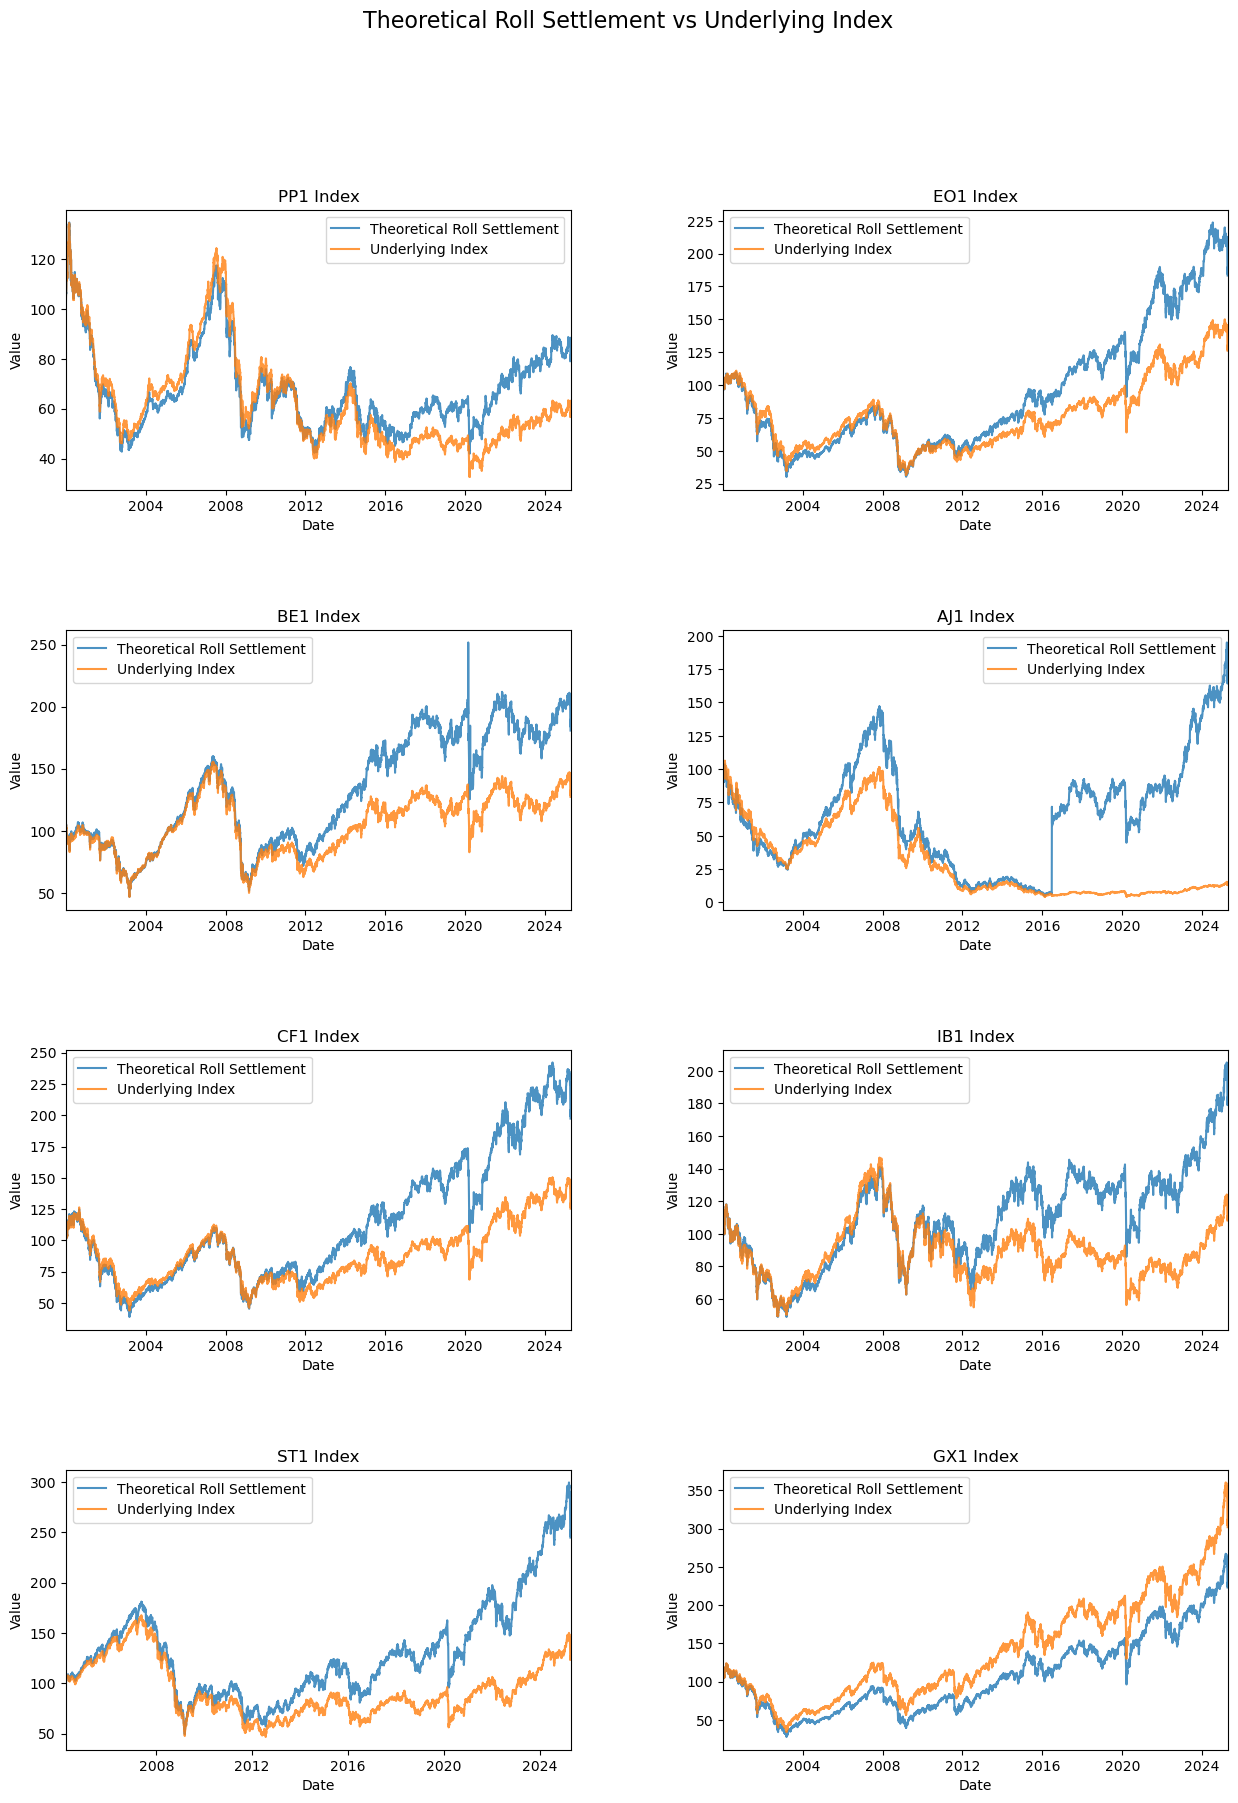

In [93]:
# Plotting the results of the theoretical roll
# VS the underlying index (fixing the start value to 100 for both)
# Each future has its own plot in a subplot
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Theoretical Roll Settlement vs Underlying Index', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for idx, future in enumerate(futures_euroindex):
    start_date = future.get_first_data_date()
    ax = axes[idx // 2, idx % 2]
    
    # Calculate multipliers to normalize both series to the same value at start_date
    roll_settle_start_value = future.roll_settle_theoretical.loc[start_date, 'Roll value']
    underlying_start_value = future.underlying_data.loc[start_date]
    
    roll_settle_multiplier = 100 / roll_settle_start_value
    underlying_multiplier = 100 / underlying_start_value
    
    # Plot normalized time series
    ax.plot(future.roll_settle_theoretical.index, 
            future.roll_settle_theoretical['Roll value'] * roll_settle_multiplier, 
            label='Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.underlying_data.index, 
            future.underlying_data * underlying_multiplier, 
            label='Underlying Index', alpha=0.8)
    
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

plt.show()

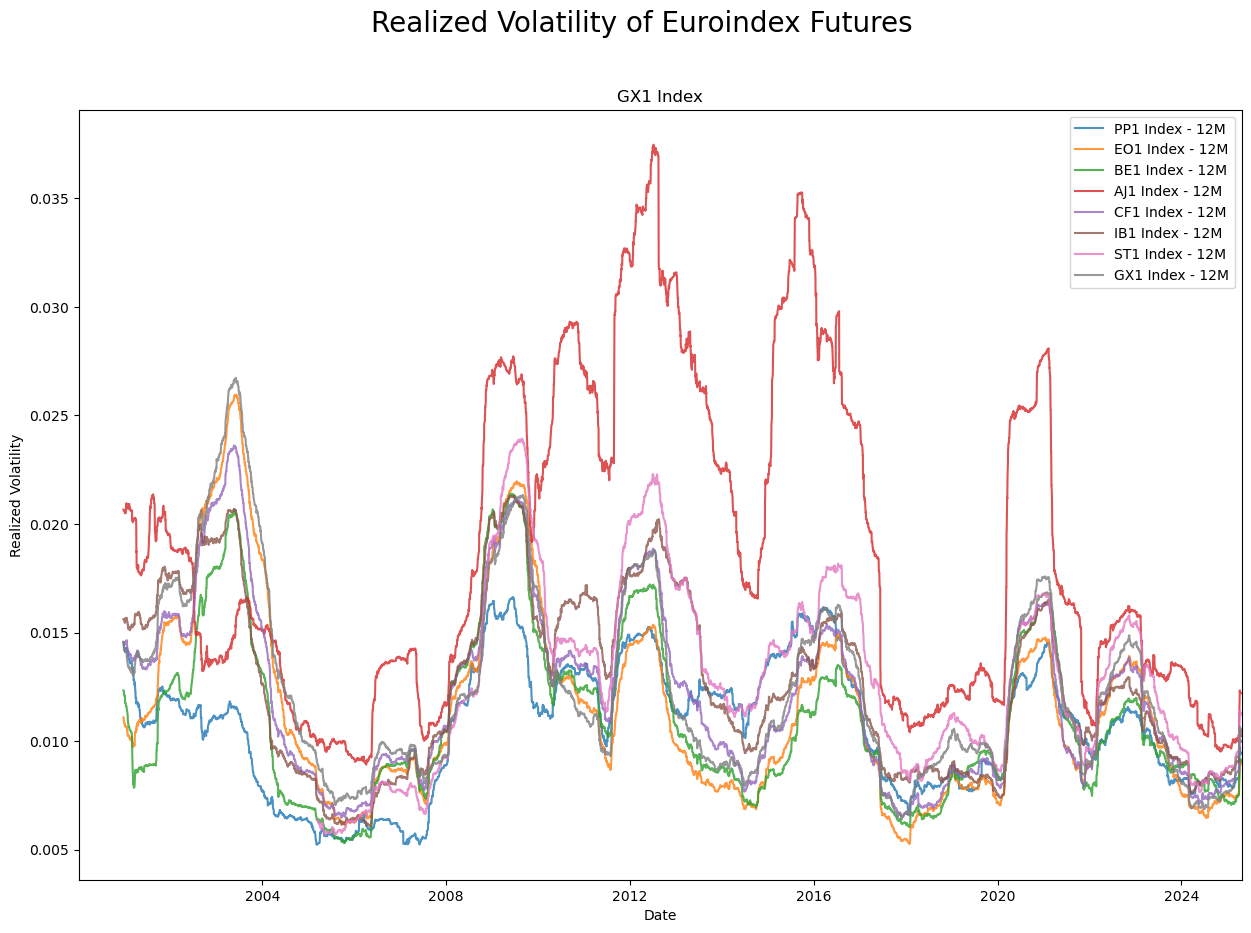

In [94]:
# Plotting all the futures realized volatilities for the roll settlement
# 12M all in one plot to compare
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Realized Volatility of Euroindex Futures', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, future in enumerate(futures_euroindex):
    ax.plot(future.realized_vol_roll_12MROLL.index,
            future.realized_vol_roll_12MROLL.values,
            label=f'{future.name} - 12M',
            alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

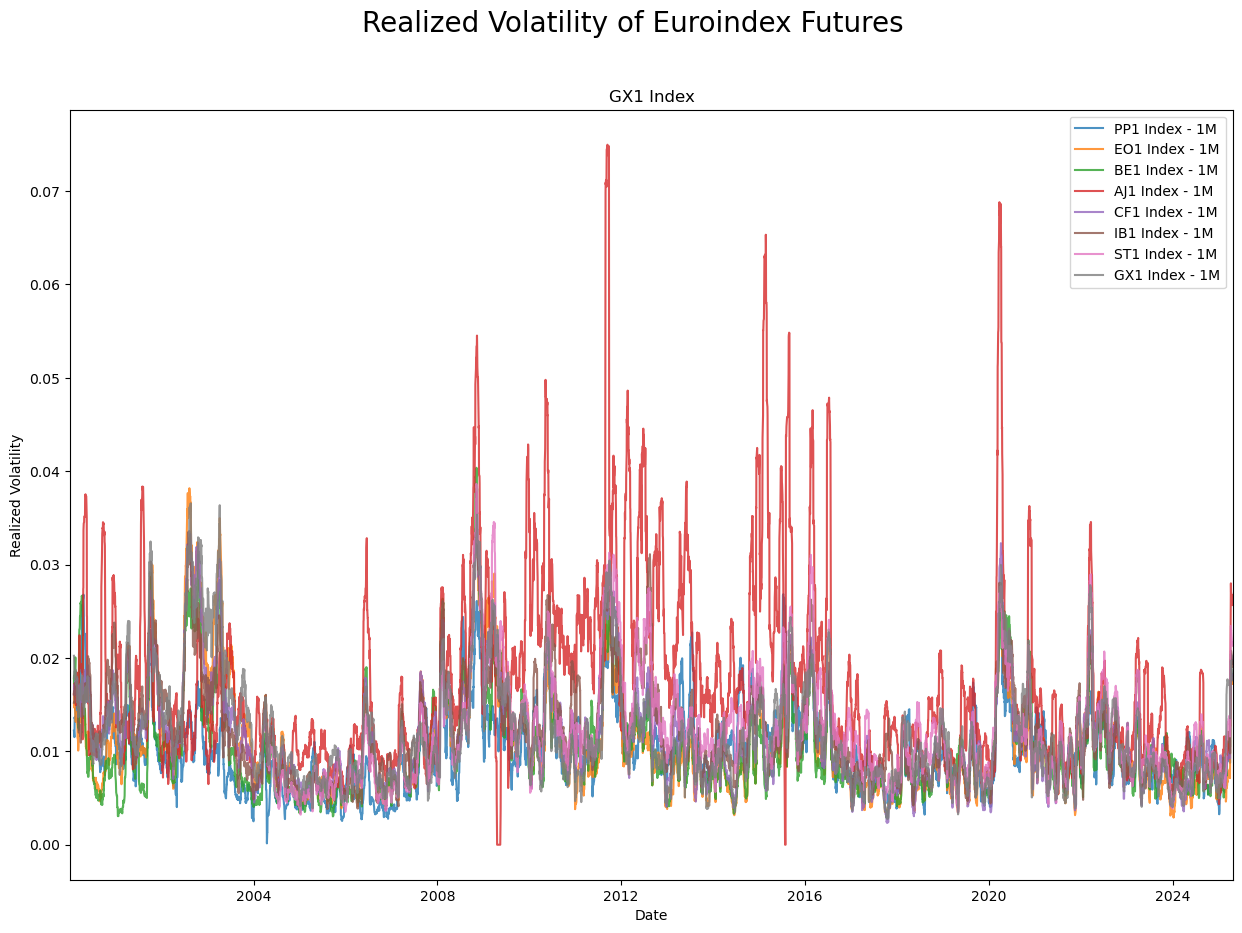

In [95]:
# Plotting all the futures realized volatilities for the roll settlement
# 1M all in one plot to compare
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Realized Volatility of Euroindex Futures', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, future in enumerate(futures_euroindex):
    ax.plot(future.realized_vol_roll_1MROLL.index,
            future.realized_vol_roll_1MROLL.values,
            label=f'{future.name} - 1M',
            alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

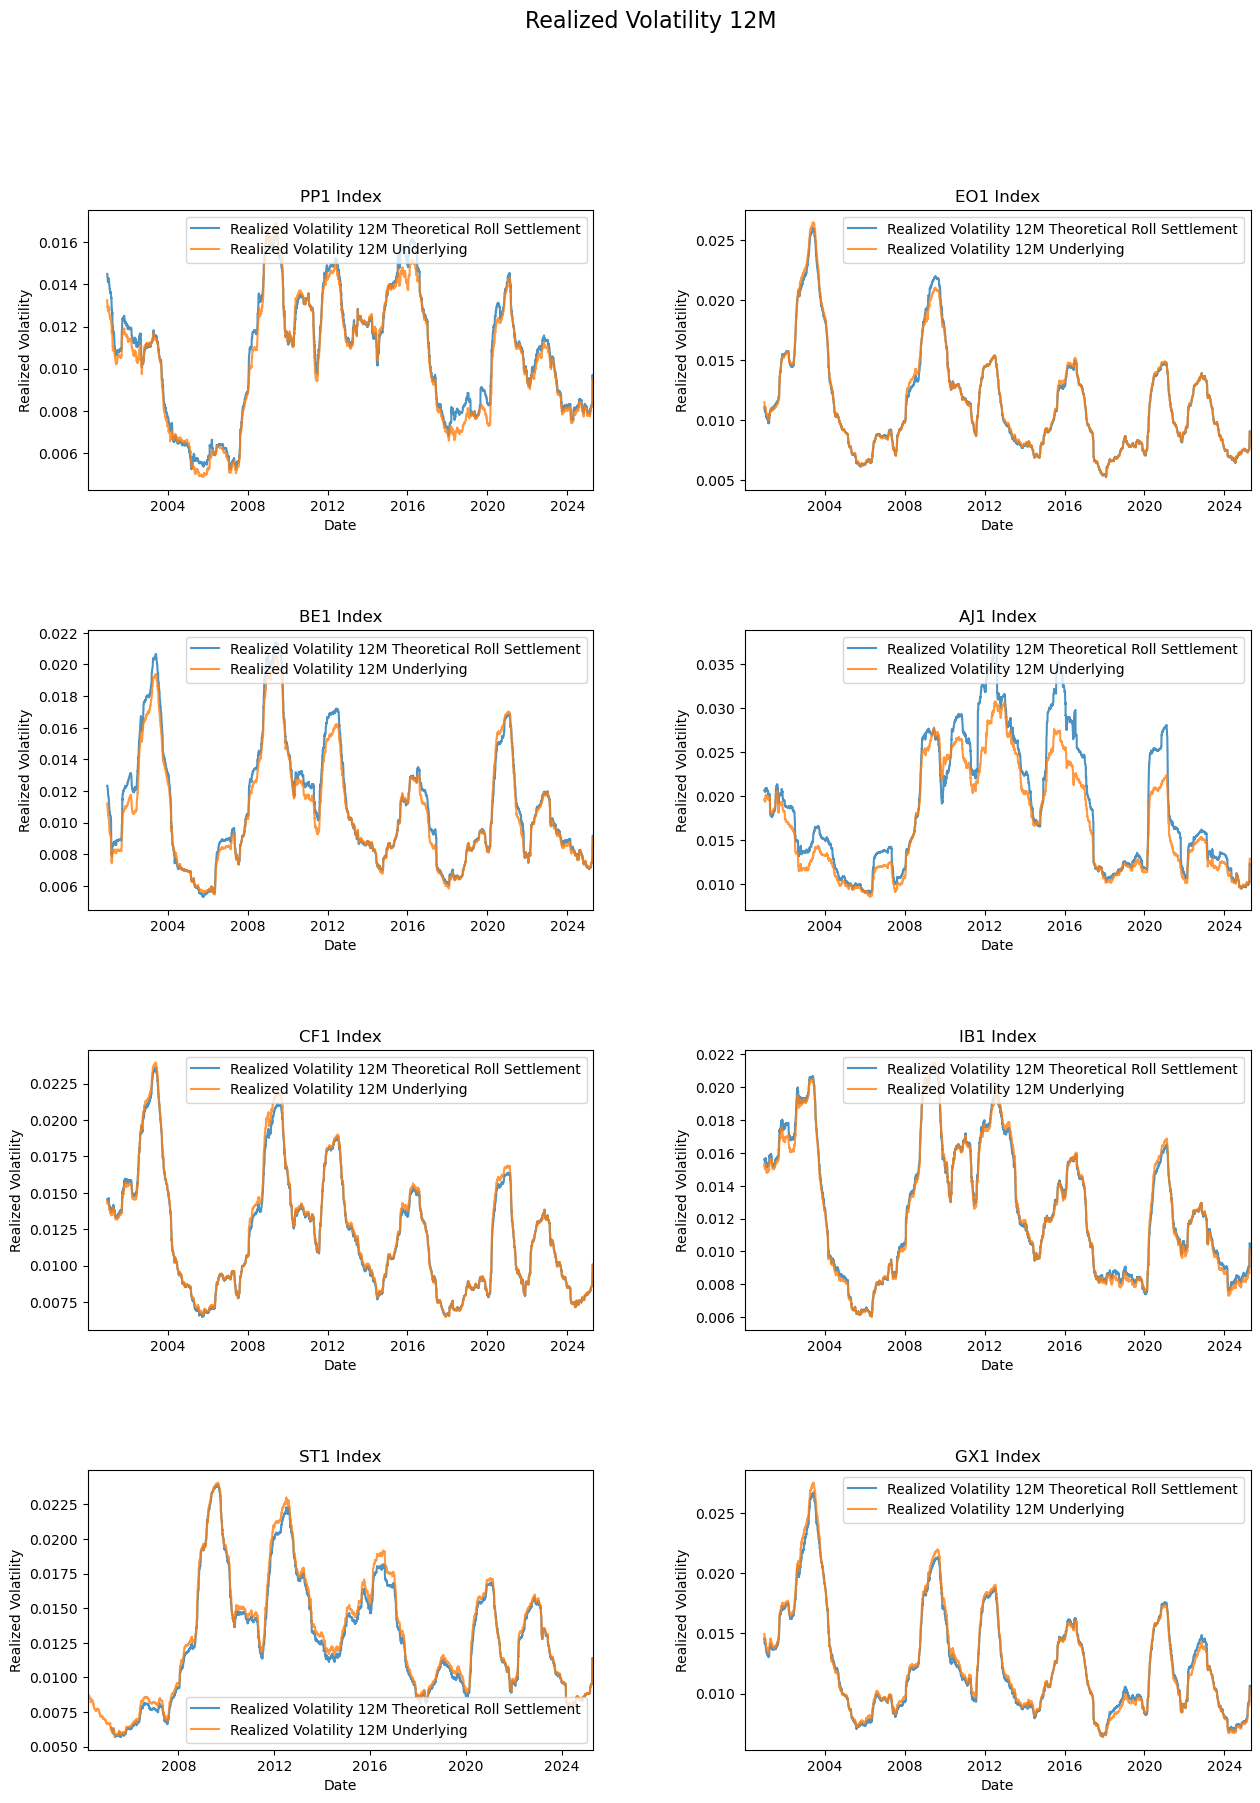

In [96]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 12M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 12M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_euroindex)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_12MROLL.index,
            future.realized_vol_roll_12MROLL, 
            label='Realized Volatility 12M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_12MROLL.index,
            future.realized_vol_undr_12MROLL, 
            label='Realized Volatility 12M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

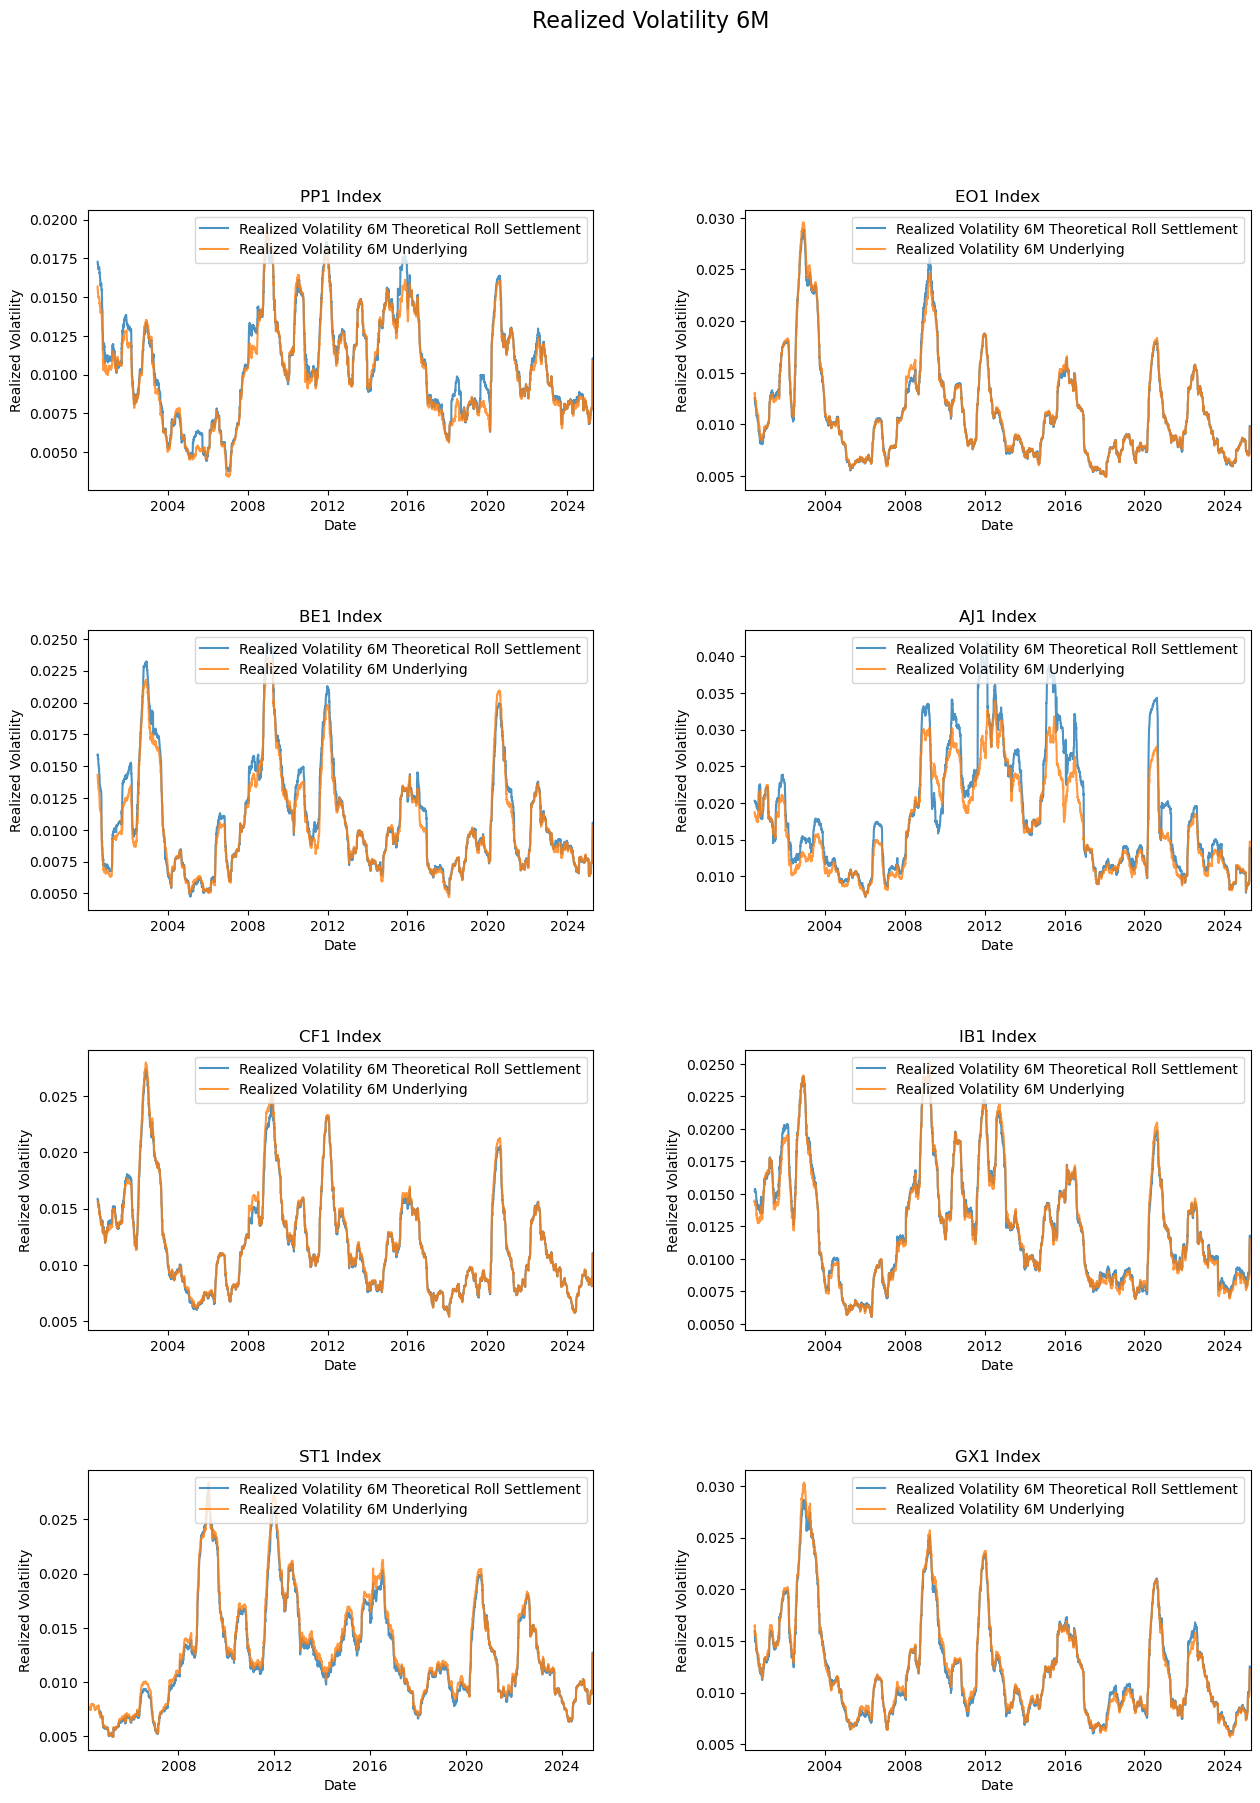

In [97]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 6M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 6M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_euroindex)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_6MROLL.index,
            future.realized_vol_roll_6MROLL, 
            label='Realized Volatility 6M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_6MROLL.index,
            future.realized_vol_undr_6MROLL, 
            label='Realized Volatility 6M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

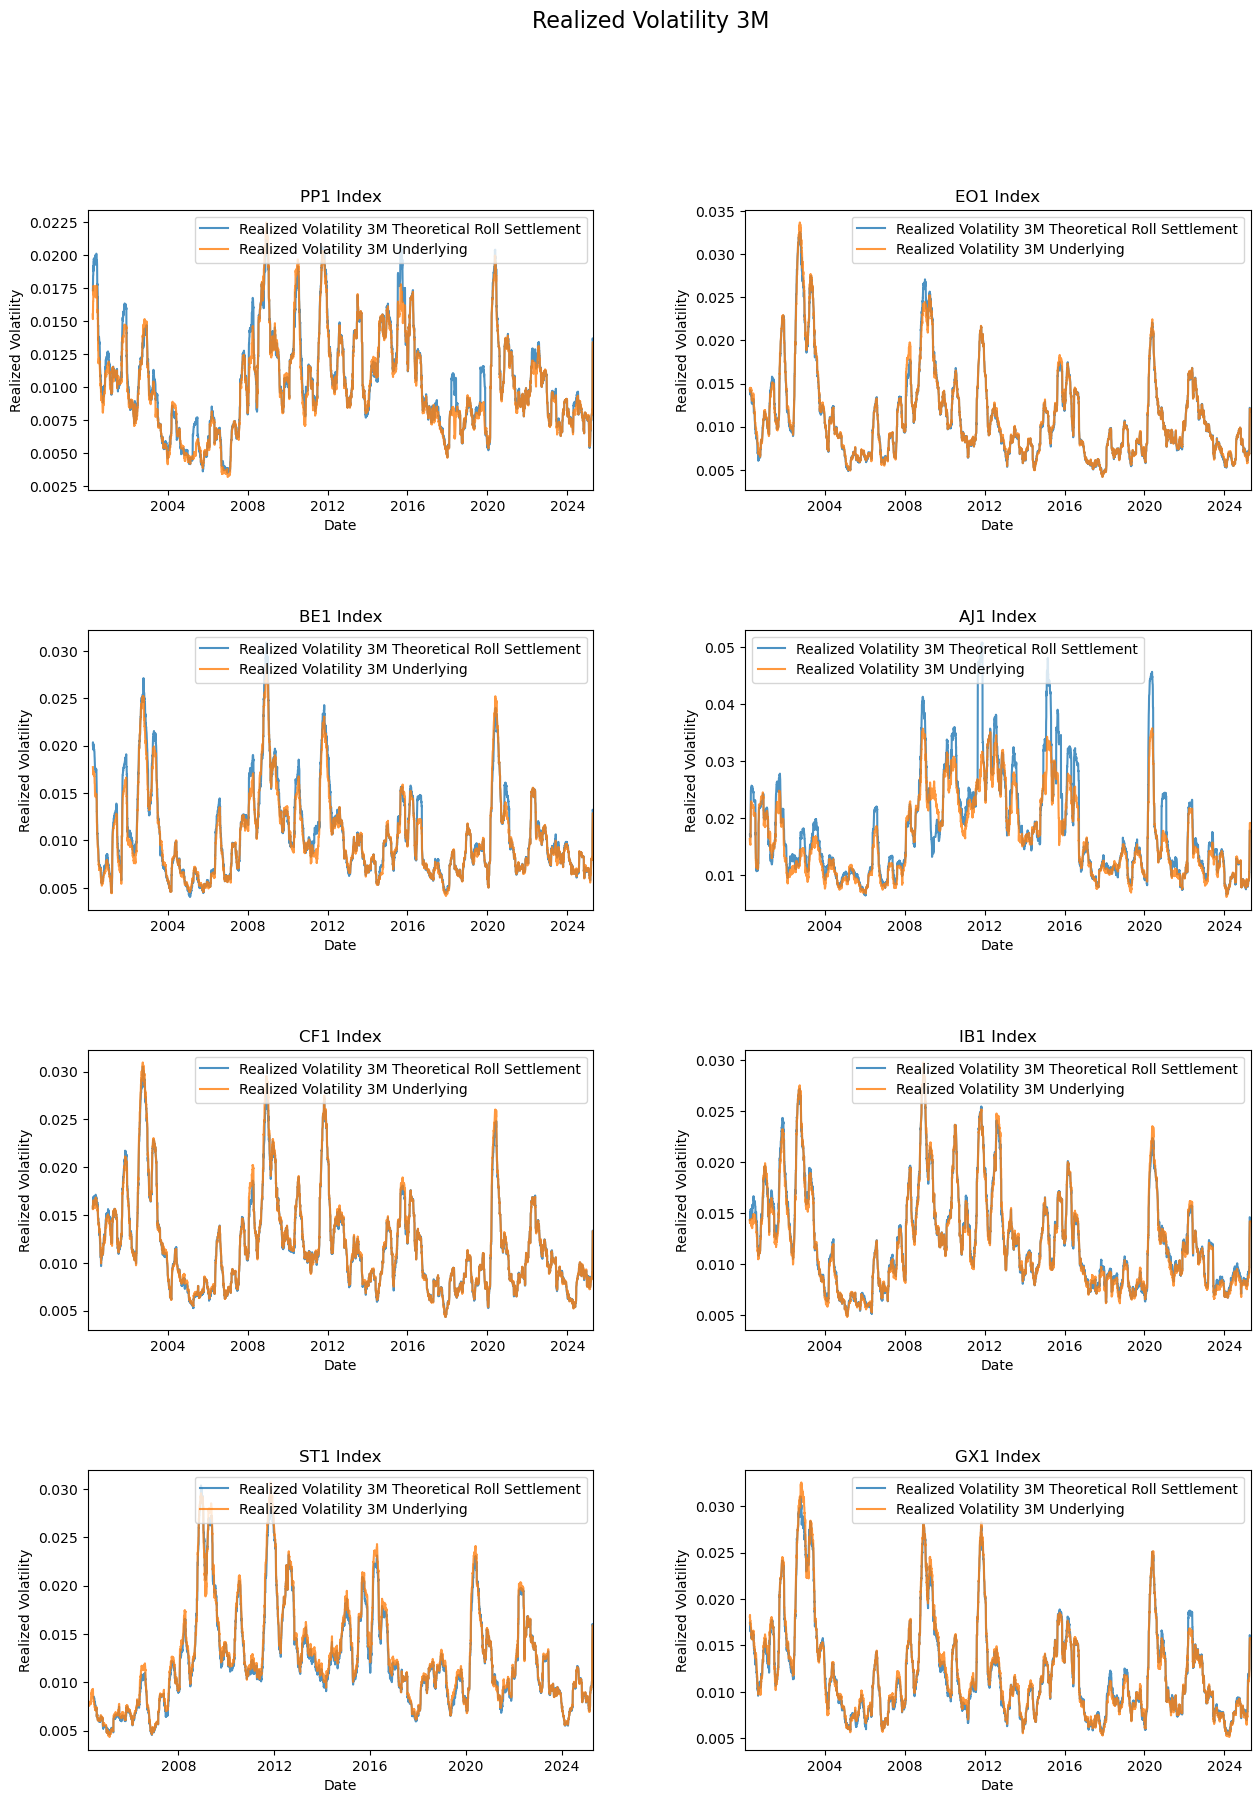

In [98]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 3M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 3M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_euroindex)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_3MROLL.index,
            future.realized_vol_roll_3MROLL, 
            label='Realized Volatility 3M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_3MROLL.index,
            future.realized_vol_undr_3MROLL, 
            label='Realized Volatility 3M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

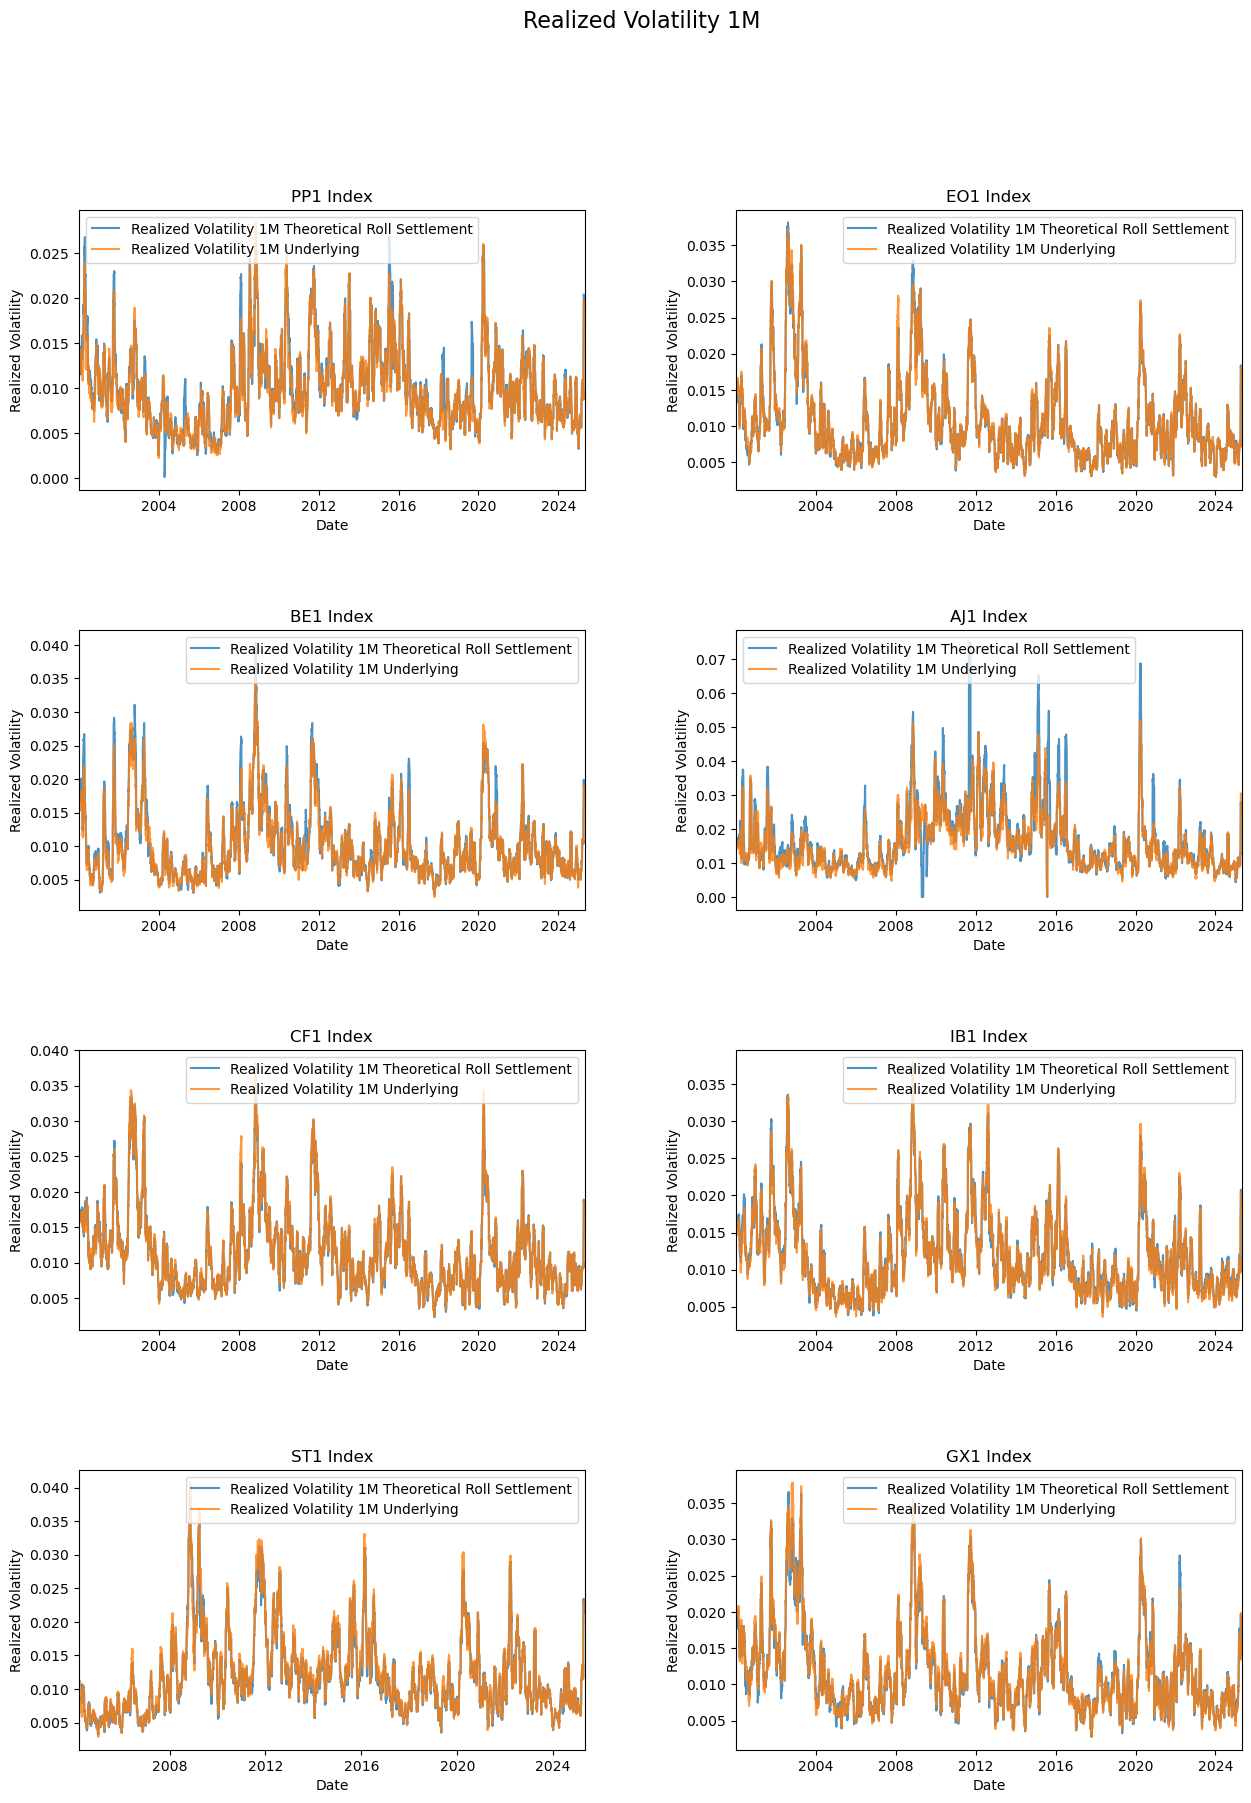

In [99]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 1M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 1M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_euroindex)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_1MROLL.index,
            future.realized_vol_roll_1MROLL, 
            label='Realized Volatility 1M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_1MROLL.index,
            future.realized_vol_undr_1MROLL, 
            label='Realized Volatility 1M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

In [100]:
# For now eliminating Greece from futures
futures_euroindex = [future for future in futures_euroindex if future.name != 'AJ1 Index']

In [101]:
futures_euroindex

[Future: PP1 Index, Underlying: PP1 Index, Number of Contracts: 140,
 Future: EO1 Index, Underlying: EO1 Index, Number of Contracts: 310,
 Future: BE1 Index, Underlying: BE1 Index, Number of Contracts: 308,
 Future: CF1 Index, Underlying: CF1 Index, Number of Contracts: 318,
 Future: IB1 Index, Underlying: IB1 Index, Number of Contracts: 321,
 Future: ST1 Index, Underlying: ST1 Index, Number of Contracts: 87,
 Future: GX1 Index, Underlying: GX1 Index, Number of Contracts: 112]

In [102]:
# Defining volatility managed strategy
vol_strategy = pb.Strategy(name='Volatility managed - test', futures=futures_euroindex, strategy_type='INVERSE_VARIANCE', date_delta=10)

In [103]:
# Getting the first date of the latest starting strategy
sim_vol_managed_12MREBAL_12MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='12M', estimation_window='12M')
first_date = sim_vol_managed_12MREBAL_12MEST['Parameters']['Start date'].values[0]

In [104]:
first_date

numpy.datetime64('2005-03-11T00:00:00.000000000')

In [105]:
sim_vol_managed_12MREBAL_12MEST['Parameters']['End date']

2005-03-11   2025-09-19
Name: End date, dtype: datetime64[ns]

In [106]:
# Building a strategy
equal_weighted_strategy = pb.Strategy(name='Equal weighted - test', futures=futures_euroindex, strategy_type='EQUAL_WEIGHTED', date_delta=10)

In [107]:
simulation_1M = equal_weighted_strategy.simulate_strategy_theoretical(strategy_type=equal_weighted_strategy.strategy_type, rebalance_frequency='1M', start_date=first_date)
simulation_3M = equal_weighted_strategy.simulate_strategy_theoretical(strategy_type=equal_weighted_strategy.strategy_type, rebalance_frequency='3M', start_date=first_date)
simulation_6M = equal_weighted_strategy.simulate_strategy_theoretical(strategy_type=equal_weighted_strategy.strategy_type, rebalance_frequency='6M', start_date=first_date)
simulation_12M = equal_weighted_strategy.simulate_strategy_theoretical(strategy_type=equal_weighted_strategy.strategy_type, rebalance_frequency='12M', start_date=first_date)

KeyboardInterrupt: 

In [ ]:
# Plotting Portfolio value for all rebalancing frequencies
# Same plot
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Value for all Rebalancing Frequencies', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(simulation_1M['Portfolio']['Portfolio value'].index, simulation_1M['Portfolio']['Portfolio value'], label='1M Rebalance', alpha=0.8)
ax.plot(simulation_3M['Portfolio']['Portfolio value'].index, simulation_3M['Portfolio']['Portfolio value'], label='3M Rebalance', alpha=0.8)
ax.plot(simulation_6M['Portfolio']['Portfolio value'].index, simulation_6M['Portfolio']['Portfolio value'], label='6M Rebalance', alpha=0.8)
ax.plot(simulation_12M['Portfolio']['Portfolio value'].index, simulation_12M['Portfolio']['Portfolio value'], label='12M Rebalance', alpha=0.8)
ax.set_xlim([equal_weighted_strategy.start_date, equal_weighted_strategy.end_date])
ax.set_title('Portfolio Value for all Rebalancing Frequencies')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

In [ ]:
# Plotting 'Reballancing (BOOLEAN)' for all rebalancing frequencies
# Each in its subplot
# This is to check if we are really rebalancing
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Rebalancing (BOOLEAN) for all Rebalancing Frequencies', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

rebalancing_frequencies = {
    '1M': simulation_1M['Portfolio']['Rebalancing (BOOLEAN)'],
    '3M': simulation_3M['Portfolio']['Rebalancing (BOOLEAN)'],
    '6M': simulation_6M['Portfolio']['Rebalancing (BOOLEAN)'],
    '12M': simulation_12M['Portfolio']['Rebalancing (BOOLEAN)']
}

for idx, (freq, data) in enumerate(rebalancing_frequencies.items()):
    ax = axes[idx // 2, idx % 2]
    ax.plot(data.index, data, label=f'{freq} Rebalance', alpha=0.8)
    ax.set_title(f'{freq} Rebalancing')
    ax.set_xlabel('Date')
    ax.set_ylabel('Rebalancing (BOOLEAN)')
    ax.legend()

plt.show()

In [ ]:
# For rebalancing 1M
sim_vol_managed_1MREBAL_1MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='1M', start_date=first_date)
sim_vol_managed_1MREBAL_3MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='3M', start_date=first_date)
sim_vol_managed_1MREBAL_6MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='6M', start_date=first_date)
sim_vol_managed_1MREBAL_12MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='12M', start_date=first_date)

# For rebalancing 3M
sim_vol_managed_3MREBAL_1MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='3M', estimation_window='1M', start_date=first_date)
sim_vol_managed_3MREBAL_3MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='3M', estimation_window='3M', start_date=first_date)
sim_vol_managed_3MREBAL_6MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='3M', estimation_window='6M', start_date=first_date)
sim_vol_managed_3MREBAL_12MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='3M', estimation_window='12M', start_date=first_date)

# For rebalancing 6M
sim_vol_managed_6MREBAL_1MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='6M', estimation_window='1M', start_date=first_date)
sim_vol_managed_6MREBAL_3MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='6M', estimation_window='3M', start_date=first_date)
sim_vol_managed_6MREBAL_6MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='6M', estimation_window='6M', start_date=first_date)
sim_vol_managed_6MREBAL_12MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='6M', estimation_window='12M', start_date=first_date)

# For rebalancing 12M
sim_vol_managed_12MREBAL_1MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='12M', estimation_window='1M', start_date=first_date)
sim_vol_managed_12MREBAL_3MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='12M', estimation_window='3M', start_date=first_date)
sim_vol_managed_12MREBAL_6MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='12M', estimation_window='6M', start_date=first_date)
sim_vol_managed_12MREBAL_12MEST = vol_strategy.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='12M', estimation_window='12M', start_date=first_date)

In [ ]:
# Plotting Portfolio value for all rebalancing frequencies
# For vol managed - Rebalancing 1M
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Value for all estimation windows with 1M rebalancing', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_managed_1MREBAL_1MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_1MREBAL_1MEST['Portfolio']['Portfolio value'], label='1M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_1MREBAL_3MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_1MREBAL_3MEST['Portfolio']['Portfolio value'], label='3M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_1MREBAL_6MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_1MREBAL_6MEST['Portfolio']['Portfolio value'], label='6M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_1MREBAL_12MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_1MREBAL_12MEST['Portfolio']['Portfolio value'], label='12M Estimation Window', alpha=0.8)
#ax.set_xlim([sim_vol_managed_1MREBAL_1MEST.start_date, sim_vol_managed_1MREBAL_1MEST.end_date])
ax.set_title('Portfolio Value for all Rebalancing Frequencies')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

In [ ]:
# Plotting Portfolio value for all rebalancing frequencies
# For vol managed - Rebalancing 3M
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Value for all estimation windows with 3M rebalancing', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_managed_3MREBAL_1MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_3MREBAL_1MEST['Portfolio']['Portfolio value'], label='1M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_3MREBAL_3MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_3MREBAL_3MEST['Portfolio']['Portfolio value'], label='3M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_3MREBAL_6MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_3MREBAL_6MEST['Portfolio']['Portfolio value'], label='6M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_3MREBAL_12MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_3MREBAL_12MEST['Portfolio']['Portfolio value'], label='12M Estimation Window', alpha=0.8)
#ax.set_xlim([sim_vol_managed_3MREBAL_1MEST.start_date, sim_vol_managed_3MREBAL_1MEST.end_date])
ax.set_title('Portfolio Value for all Rebalancing Frequencies')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()


In [ ]:
# Plotting Portfolio value for all rebalancing frequencies
# For vol managed - Rebalancing 6M
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Value for all estimation windows with 6M rebalancing', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_managed_6MREBAL_1MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_6MREBAL_1MEST['Portfolio']['Portfolio value'], label='1M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_6MREBAL_3MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_6MREBAL_3MEST['Portfolio']['Portfolio value'], label='3M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_6MREBAL_6MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_6MREBAL_6MEST['Portfolio']['Portfolio value'], label='6M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_6MREBAL_12MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_6MREBAL_12MEST['Portfolio']['Portfolio value'], label='12M Estimation Window', alpha=0.8)
#ax.set_xlim([sim_vol_managed_6MREBAL_1MEST.start_date, sim_vol_managed_6MREBAL_1MEST.end_date])
ax.set_title('Portfolio Value for all Rebalancing Frequencies')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

In [ ]:
# Plotting Portfolio value for all rebalancing frequencies
# For vol managed - Rebalancing 12M
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Value for all estimation windows with 12M rebalancing', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_managed_12MREBAL_1MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_12MREBAL_1MEST['Portfolio']['Portfolio value'], label='1M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_12MREBAL_3MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_12MREBAL_3MEST['Portfolio']['Portfolio value'], label='3M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_12MREBAL_6MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_12MREBAL_6MEST['Portfolio']['Portfolio value'], label='6M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_12MREBAL_12MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_12MREBAL_12MEST['Portfolio']['Portfolio value'], label='12M Estimation Window', alpha=0.8)
#ax.set_xlim([sim_vol_managed_12MREBAL_1MEST.start_date, sim_vol_managed_12MREBAL_1MEST.end_date])
ax.set_title('Portfolio Value for all Rebalancing Frequencies')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

In [ ]:
# Now we will plot for the same estimation windows
# For all the rebalancing frequencies
# For vol managed - Estimation window 1M
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Value for all rebalancing frequencies with 1M estimation window', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_managed_1MREBAL_1MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_1MREBAL_1MEST['Portfolio']['Portfolio value'], label='1M Rebalance', alpha=0.8)
ax.plot(sim_vol_managed_3MREBAL_1MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_3MREBAL_1MEST['Portfolio']['Portfolio value'], label='3M Rebalance', alpha=0.8)
ax.plot(sim_vol_managed_6MREBAL_1MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_6MREBAL_1MEST['Portfolio']['Portfolio value'], label='6M Rebalance', alpha=0.8)
ax.plot(sim_vol_managed_12MREBAL_1MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_12MREBAL_1MEST['Portfolio']['Portfolio value'], label='12M Rebalance', alpha=0.8)
#ax.set_xlim([sim_vol_managed_1MREBAL_1MEST.start_date, sim_vol_managed_1MREBAL_1MEST.end_date])
ax.set_title('Portfolio Value for all Rebalancing Frequencies')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

In [ ]:
# Plotting Portfolio value for all rebalancing frequencies
# For vol managed - Rebalancing 6M
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Value for all estimation windows with 6M rebalancing', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_managed_6MREBAL_1MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_6MREBAL_1MEST['Portfolio']['Portfolio value'], label='1M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_6MREBAL_3MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_6MREBAL_3MEST['Portfolio']['Portfolio value'], label='3M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_6MREBAL_6MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_6MREBAL_6MEST['Portfolio']['Portfolio value'], label='6M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_6MREBAL_12MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_6MREBAL_12MEST['Portfolio']['Portfolio value'], label='12M Estimation Window', alpha=0.8)
#ax.set_xlim([sim_vol_managed_6MREBAL_1MEST.start_date, sim_vol_managed_6MREBAL_1MEST.end_date])
ax.set_title('Portfolio Value for all Rebalancing Frequencies')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

In [ ]:
# Plotting Portfolio value for all rebalancing frequencies
# For vol managed - Rebalancing 6M
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Value for all estimation windows with 6M rebalancing', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_managed_1MREBAL_6MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_1MREBAL_6MEST['Portfolio']['Portfolio value'], label='1M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_3MREBAL_6MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_3MREBAL_6MEST['Portfolio']['Portfolio value'], label='3M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_6MREBAL_6MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_6MREBAL_6MEST['Portfolio']['Portfolio value'], label='6M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_12MREBAL_6MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_12MREBAL_6MEST['Portfolio']['Portfolio value'], label='12M Estimation Window', alpha=0.8)
#ax.set_xlim([sim_vol_managed_1MREBAL_1MEST.start_date, sim_vol_managed_1MREBAL_1MEST.end_date])
ax.set_title('Portfolio Value for all Rebalancing Frequencies')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

In [ ]:
# Plotting Portfolio value for all rebalancing frequencies
# For vol managed - Rebalancing 12M
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Value for all estimation windows with 12M rebalancing', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_managed_1MREBAL_12MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_1MREBAL_12MEST['Portfolio']['Portfolio value'], label='1M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_3MREBAL_12MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_3MREBAL_12MEST['Portfolio']['Portfolio value'], label='3M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_6MREBAL_12MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_6MREBAL_12MEST['Portfolio']['Portfolio value'], label='6M Estimation Window', alpha=0.8)
ax.plot(sim_vol_managed_12MREBAL_12MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_12MREBAL_12MEST['Portfolio']['Portfolio value'], label='12M Estimation Window', alpha=0.8)
#ax.set_xlim([sim_vol_managed_1MREBAL_1MEST.start_date, sim_vol_managed_1MREBAL_1MEST.end_date])
ax.set_title('Portfolio Value for all Rebalancing Frequencies')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

In [ ]:
# Comparing the two strategies
# Plotting Portfolio value for 1M rebalancing, 1M estimation window
# vs the Equal weighted strategy
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Value for 1M Rebalancing, 1M Estimation Window vs Equal Weighted Strategy', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_managed_1MREBAL_1MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_1MREBAL_1MEST['Portfolio']['Portfolio value'], label='Volatility Managed - 1M Rebalance', alpha=0.8)
ax.plot(simulation_1M['Portfolio']['Portfolio value'].index, simulation_1M['Portfolio']['Portfolio value'], label='Equal Weighted - 1M Rebalance', alpha=0.8)
#ax.set_xlim([sim_vol_managed_1MREBAL_1MEST.start_date, sim_vol_managed_1MREBAL_1MEST.end_date])
ax.set_title('Portfolio Value for 1M Rebalancing, 1M Estimation Window vs Equal Weighted Strategy')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

In [ ]:
# Comparing the two strategies
# Plotting Portfolio value for 3M rebalancing, 1M estimation window
# vs the Equal weighted strategy 3M
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Portfolio Value for 3M Rebalancing, 1M Estimation Window vs Equal Weighted Strategy', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_managed_3MREBAL_1MEST['Portfolio']['Portfolio value'].index, sim_vol_managed_3MREBAL_1MEST['Portfolio']['Portfolio value'], label='Volatility Managed - 3M Rebalance', alpha=0.8)
ax.plot(simulation_3M['Portfolio']['Portfolio value'].index, simulation_3M['Portfolio']['Portfolio value'], label='Equal Weighted - 3M Rebalance', alpha=0.8)
#ax.set_xlim([sim_vol_managed_3MREBAL_1MEST.start_date, sim_vol_managed_3MREBAL_1MEST.end_date])
ax.set_title('Portfolio Value for 3M Rebalancing, 1M Estimation Window vs Equal Weighted Strategy')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

In [ ]:
# Plotting weights
pb.plot_weights(sim_vol_managed_1MREBAL_1MEST['Weights'], title='Weights for Volatility Managed Strategy - 1M Rebalance, 1M Estimation Window', figsize=(15, 10))

In [ ]:
# Plotting weights
pb.plot_weights(sim_vol_managed_3MREBAL_3MEST['Weights'], title='Weights for Volatility Managed Strategy - 3M Rebalance, 3M Estimation Window', figsize=(15, 10))

In [ ]:
# Plotting weights
pb.plot_weights(sim_vol_managed_6MREBAL_6MEST['Weights'], title='Weights for Volatility Managed Strategy - 6M Rebalance, 6M Estimation Window', figsize=(15, 10))

In [ ]:
# Plotting weights
pb.plot_weights(sim_vol_managed_12MREBAL_12MEST['Weights'], title='Weights for Volatility Managed Strategy - 12M Rebalance, 12M Estimation Window', figsize=(15, 10))

In [ ]:
# Plotting weights
pb.plot_weights(simulation_1M['Weights'], title='Weights for Equal Weighted Strategy - 1M Rebalance', figsize=(15, 10))

In [ ]:
# Plotting weights
pb.plot_weights(simulation_3M['Weights'], title='Weights for Equal Weighted Strategy - 3M Rebalance', figsize=(15, 10))

In [ ]:
# Plotting weights
pb.plot_weights(simulation_6M['Weights'], title='Weights for Equal Weighted Strategy - 6M Rebalance', figsize=(15, 10))

In [ ]:
# Plotting weights
pb.plot_weights(simulation_12M['Weights'], title='Weights for Equal Weighted Strategy - 12M Rebalance', figsize=(15, 10))